# Project 2: Clustering + SVM: Can We Predict Purchases from Web Sites?

**Group members: Yifeng Lin(Yifeng will finish assignments individually before final project), Yuan Zheng and Ziyang Guo**

## Introduction:  
  
  Online retailers are very popular in the recent decade. So today we are going to use supervised learning and unsupervised learning to predict if users have taken the action to buy things. Most of them are prolific users of data science methods for a variety of purposes. In this project, we will run a data set comprised of a variety of such website metrics. We will use clustering algorithms to create groupings for similar data observations within the provided data set to apply a label to data observations. Also, we will construct an SVM model to predict the most likely categorization of any previously unseen data items.

In [1]:
# load the pandas & numpy libraries and matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/YuanZheng2828/DAV-6150/main/Project2_Data.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


## Pre-Clustering Exploratory Data Analysis :

In [3]:
data.shape

(12330, 17)

In [4]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [5]:
label = pd.read_csv('https://raw.githubusercontent.com/Destiny-G1997/DAV-6150/main/Project2_Data_Labels.csv')
label.head()

,Revenue
0,True
1,False
2,False
3,False
4,False


We need to set up two groups to separate categorical data and numerical data

In [6]:
data_num = data[['Administrative','Administrative_Duration','Informational','Informational_Duration',
                 'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]

In [7]:
data_cat=data[['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']]

In [8]:
# turn the name of columns into list
column_num=data_num.columns.to_list()
column_cat=data_cat.columns.to_list()

C:\Users\guozi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guozi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guozi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guozi\anaconda3\lib\si

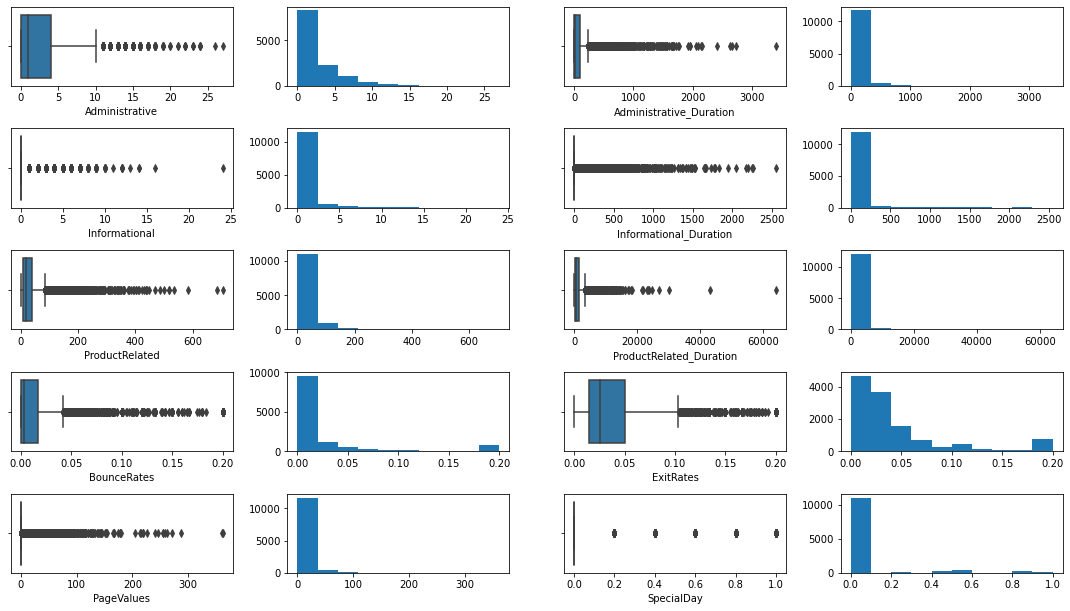

In [9]:
#show histogram and boxplot of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(10):
    n=2*i
    plt.subplot(12,4,n+1)
    sns.boxplot(data_num[column_num[i]])
    plt.subplot(12,4,n+2)
    plt.hist(data_num[column_num[i]])
    
plt.tight_layout()

According to the above numerical charts, we found that each attribute might have some outliers. And all numerical attributes here are right-skewed distribution. Most of the values are gathered at the low-value interval.

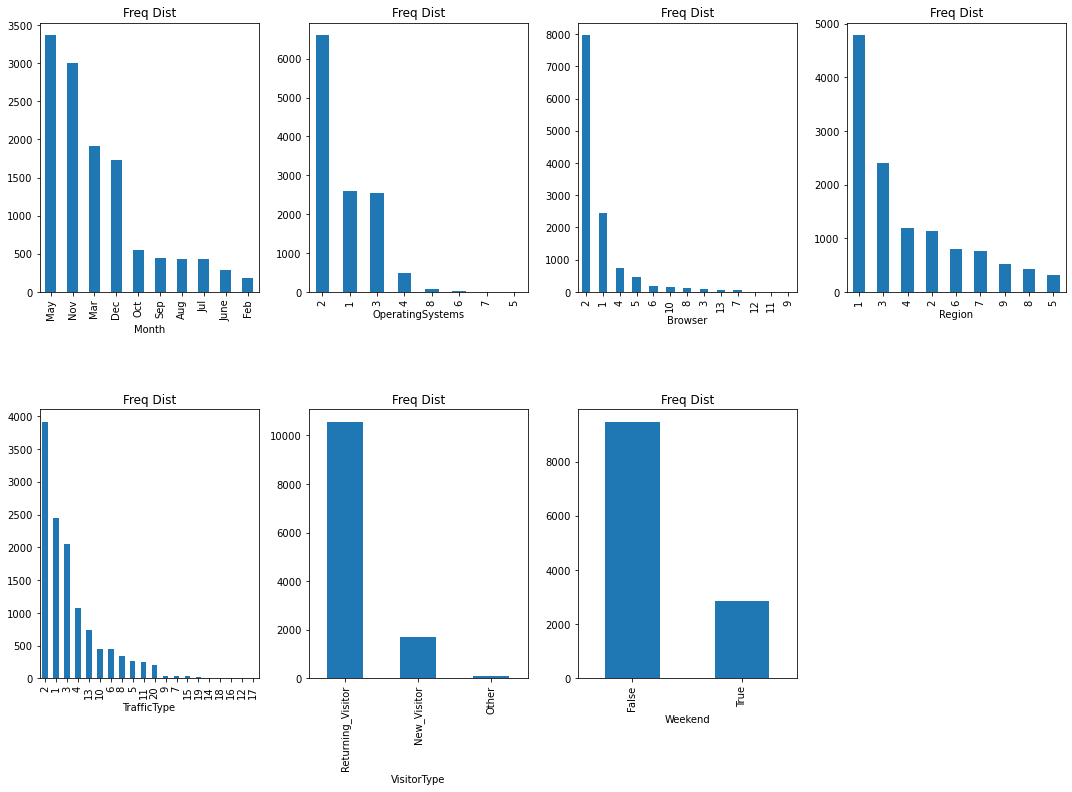

In [10]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(len(column_cat)):
    plt.subplot(3,4,i+1)
    data_cat[column_cat[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat[i])
plt.tight_layout()

- In the chart of 'Month', we found the May appears most and followed by November March and December
- In the chart of 'Operating System', the kind of '2' operating system appears most and followed by '1' and '3'.
- In the chart of Browser, the kind of '2' browser appears most and followed by '1' and '4'.
- In the chart of Region, we can know that most browsing records happened in the region '1', then  '3' and '4' is followed by the most one. The region of '9', '8' and '5' have fewer records than other places.
- In the chart of TrafficType, we found that the kind of '2' traffic is most popular and followed by'1' and '3'.
- In the chart of VisitorType, The returning_visitor has taken a big part of the whole visit, which is more than 10000. And the new_visitor is about 2000. The other visitors are even fewer.
- In the chart for Weekend, we can know that most visitors like to browse on weekdays rather than weekends.

In [11]:
data_num.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000


According to Pearson's correlation matrix, we found there are no attributes that are highly correlated.

In [12]:
data_num.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


## Pre-Clustering Data Preparation

According to the result, we can see that the 'Revenue' and some categorical attributes in data need to be changed into dummy variables. And finish Standardization.

**Get Dummy**

In [13]:
# apply get_dummies to some categorical attributes
label['Revenue'] = pd.get_dummies(label['Revenue'])
data['Weekend'] = pd.get_dummies(data['Weekend'])
data = pd.get_dummies(data, columns = ['VisitorType'], prefix = ['VisitorType'])
data = pd.get_dummies(data, columns = ['Month'], prefix = ['Month'])
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,0


**Standardization**

In [14]:
data_num

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.00,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0
1,0,0.00,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0
2,4,37.50,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0
3,4,115.70,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0
4,1,60.00,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
12325,3,148.00,0,0.0,8,292.500000,0.000000,0.027273,0.000000,0.0
12326,1,9.00,1,29.5,23,1157.583333,0.007692,0.053846,0.000000,0.0
12327,0,0.00,0,0.0,91,4157.633333,0.010000,0.028013,0.000000,0.0
12328,0,0.00,0,0.0,38,1417.666667,0.016117,0.048718,0.000000,1.0


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']])

StandardScaler()

In [17]:
data_num1 = pd.DataFrame(scaler.transform(data[['Administrative','Administrative_Duration','Informational','Informational_Duration',
                 'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]),columns = ['Administrative','Administrative_Duration','Informational','Informational_Duration',
                 'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay'])
data_num1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821
...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.380046,-0.396478,-0.244931,-0.533607,-0.471494,-0.457683,-0.325141,-0.317178,-0.308821
12326,-0.395938,-0.406278,0.390859,-0.035329,-0.196329,-0.019420,-0.299034,0.221699,-0.317178,-0.308821
12327,-0.696993,-0.457191,-0.396478,-0.244931,1.332665,1.548338,-0.251439,-0.309897,-0.317178,-0.308821
12328,-0.696993,-0.457191,-0.396478,-0.244931,0.140949,0.116493,-0.125276,0.116168,-0.317178,4.718598


In [18]:
data['Administrative'] = data_num1['Administrative']
data['Administrative_Duration'] = data_num1['Administrative_Duration']
data['Informational'] = data_num1['Informational']
data['Informational_Duration'] = data_num1['Informational_Duration']
data['ProductRelated'] = data_num1['ProductRelated']
data['ProductRelated_Duration'] = data_num1['ProductRelated_Duration']
data['BounceRates'] = data_num1['BounceRates']
data['ExitRates'] = data_num1['ExitRates']
data['PageValues'] = data_num1['PageValues']
data['SpecialDay'] = data_num1['SpecialDay']

In [19]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,...,0,0,0,0,0,0,1,0,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,...,0,0,0,0,0,1,0,0,0,0
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.380046,-0.396478,-0.244931,-0.533607,-0.471494,-0.457683,-0.325141,-0.317178,-0.308821,...,0,0,0,0,0,1,0,0,0,0
12326,-0.395938,-0.406278,0.390859,-0.035329,-0.196329,-0.019420,-0.299034,0.221699,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
12327,-0.696993,-0.457191,-0.396478,-0.244931,1.332665,1.548338,-0.251439,-0.309897,-0.317178,-0.308821,...,0,0,0,1,0,0,0,0,0,0
12328,-0.696993,-0.457191,-0.396478,-0.244931,0.140949,0.116493,-0.125276,0.116168,-0.317178,4.718598,...,0,0,0,0,0,0,1,0,0,0


## Clustering Modeling

In [20]:
# Common imports
import numpy as np
import os
# import KMeans Cluster
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn import neighbors
import matplotlib.pyplot as plt

In [21]:
X = data.copy()
km = KMeans(2, random_state=42)

**K-means Clustering**

Text(0, 0.5, 'Inertia')

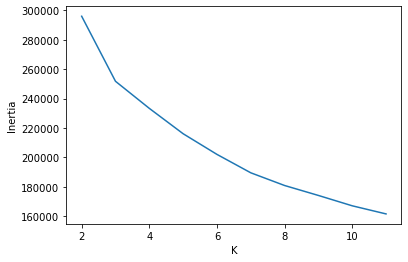

In [22]:
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

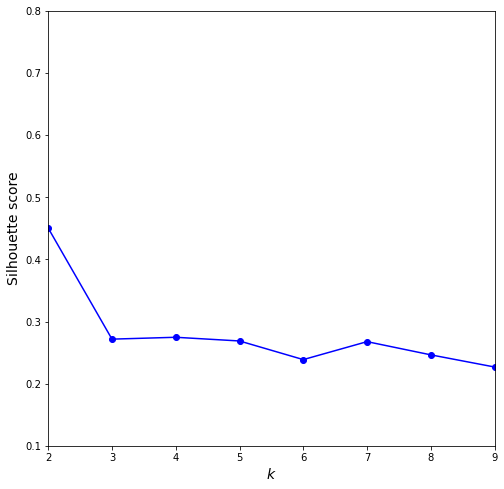

In [25]:
plt.figure(figsize=(8, 8))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2.0, 9.0, 0.10, 0.80])
plt.show()

According to the inertia line plot and silhouette score line plot, we can see that the line pivot when k between 2 and 4. And in the silhouette score line plot, the changing of silhouette score gets insignificant when K > 3. So, 3 is an effective choice for use in our model.

In [26]:
km.fit(X)

KMeans(n_clusters=2, random_state=42)

In [27]:
km.inertia_

296028.2616685796

**Hierarchical Clustering**

In [28]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering().fit(X)
ac

AgglomerativeClustering()

In [29]:
Label = ac.labels_

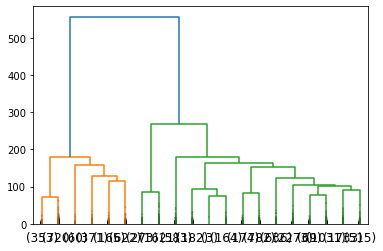

In [30]:
from scipy.cluster import hierarchy
dend = hierarchy.dendrogram(
    hierarchy.linkage(X, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True,
)

According to the above chart, we can see that if we chose 3 as K values, there will be a small group and two normal groups, which could be better divided by setting K values as 2. The whole thing will be separated into 2 clusters which is an optimal number for doing further research.

**Create Labels**

In [31]:
Labels = km.predict(X)
(
    X.assign(cluster=Labels, survived=Labels)
    .groupby("cluster")
    .agg(["mean", "var"])
    .T
)

cluster                                     0         1
Administrative                mean  -0.063215  0.012984
                              var    1.037709  0.991464
Administrative_Duration       mean  -0.019048  0.003912
                              var    1.030389  0.993866
Informational                 mean  -0.058834  0.012084
                              var    0.986705  1.002068
Informational_Duration        mean  -0.039885  0.008192
                              var    0.995451  1.000736
ProductRelated                mean  -0.056131  0.011529
                              var    1.053817  0.988366
ProductRelated_Duration       mean  -0.034413  0.007068
                              var    1.129182  0.973379
BounceRates                   mean   0.160042 -0.032872
                              var    1.302123  0.931822
ExitRates                     mean   0.157273 -0.032303
                              var    1.228204  0.947216
PageValues                    mean   0.005756 -0.001182
                              var    1.401432  0.917766
SpecialDay                    mean  -0.001098  0.000226
                              var    0.980289  1.004242
OperatingSystems              mean   2.398858  2.067553
                              var    1.470361  0.680516
Browser                       mean   2.554498  2.316551
                              var    5.018576  2.514764
Region                        mean   3.280343  3.120051
                              var    6.568513  5.599392
TrafficType                   mean  12.006188  2.439437
                              var   10.944247  1.686325
Weekend                       mean   0.752499  0.770457
                              var    0.186333  0.176871
VisitorType_New_Visitor       mean   0.136126  0.137648
                              var    0.117651  0.118713
VisitorType_Other             mean   0.027606  0.002640
                              var    0.026857  0.002633
VisitorType_Returning_Visitor mean   0.836268  0.859713
                              var    0.136989  0.120619
Month_Aug                     mean   0.015707  0.039105
                              var    0.015467  0.037579
Month_Dec                     mean   0.166587  0.134617
                              var    0.138902  0.116507
Month_Feb                     mean   0.000000  0.017988
                              var    0.000000  0.017666
Month_Jul                     mean   0.021894  0.037736
                              var    0.021425  0.036315
Month_June                    mean   0.020942  0.023854
                              var    0.020514  0.023287
Month_Mar                     mean   0.148501  0.155929
                              var    0.126508  0.131628
Month_May                     mean   0.222275  0.283214
                              var    0.172951  0.203024
Month_Nov                     mean   0.356973  0.219767
                              var    0.229653  0.171486
Month_Oct                     mean   0.032366  0.047023
                              var    0.031333  0.044816
Month_Sep                     mean   0.014755  0.040766
                              var    0.014544  0.039108
survived                      mean   0.000000  1.000000
                              var    0.000000  0.000000

## Post-Clustering Exploratory Data Analysis

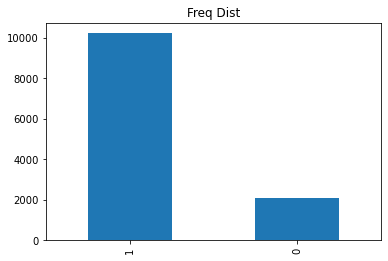

In [32]:
# show the distribution of predict result of Kmeans
clf = KMeans(n_clusters=2,random_state=42)
y_pred = clf.fit_predict(X)
y_pred=pd.Series(y_pred)
y_pred.value_counts().plot.bar(title = "Freq Dist")

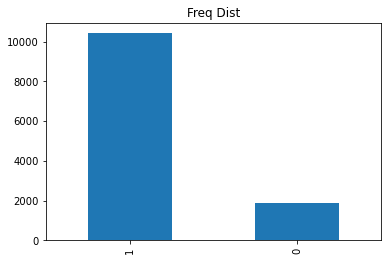

In [33]:
#Show the distribution of before result of revenue
label.Revenue.value_counts().plot.bar(title = "Freq Dist")

The above two bar plots tell us that the roughly predicted result is good and we need to make a confusion matrix to see the differences.

C:\Users\guozi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guozi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guozi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guozi\anaconda3\lib\si

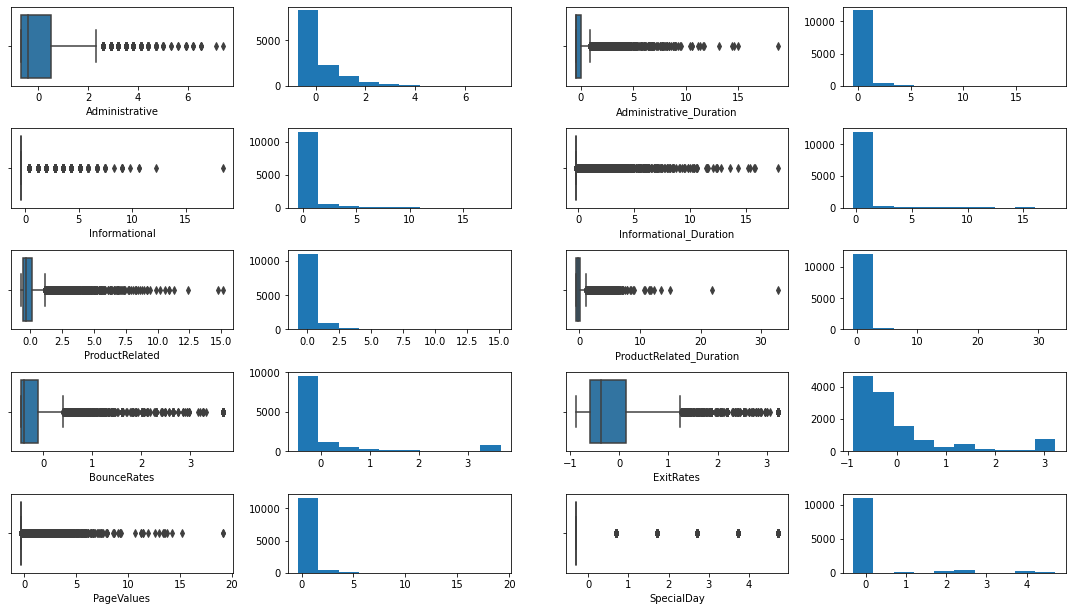

In [34]:
#show histogram and boxplot of each attribute in the numerical dataset after standardize
fig=plt.figure(figsize=(15,20))
for i in range(10):
    n=2*i
    plt.subplot(12,4,n+1)
    sns.boxplot(data[column_num[i]])
    plt.subplot(12,4,n+2)
    plt.hist(data[column_num[i]])
    
plt.tight_layout()

After standardization, we find that most dimensions and values are at the same level, which will help us to do cluster better.

## Clustering Output vs. Actual Labels

In [35]:
Revenue = Labels

In [36]:
data['V_Revenue'] = Revenue

In [37]:
data['V_Revenue']

0        1
1        1
2        1
3        1
4        1
        ..
12325    1
12326    1
12327    0
12328    1
12329    1
Name: V_Revenue, Length: 12330, dtype: int32

In [38]:
label['Revenue']

0        0
1        1
2        1
3        1
4        1
        ..
12325    1
12326    1
12327    1
12328    1
12329    1
Name: Revenue, Length: 12330, dtype: uint8

In [39]:
ct = pd.crosstab(data['V_Revenue'], label['Revenue'])
ct

Revenue,0,1
V_Revenue,,
0,333,1768
1,1575,8654


In [40]:
# Python function that calculates and returns the Accuracy metric
def accuracy (a,b):
    accuracy = pd.crosstab(a,b)
    TP = accuracy.iloc[(1,1)]
    TN = accuracy.iloc[(0,0)]
    FN = accuracy.iloc[(1,0)]
    FP = accuracy.iloc[(0,1)]
    score = (TP+TN)/(TP+FP+TN+FN)
    return score
accuracy(data['V_Revenue'], label['Revenue'])

0.7288726682887267

We can see that the accuracy of our Kmeans Clustering is 72.88 %

## SVM Modeling

We seleted 2 models to apply the SVM modeling based on the domin knowledge and the result of EDA.  

Model 1: 'Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','Browser','Revenue'  
  
Model 2:
'Administrative','Administrative_Duration','Informational','Informational_Duration','VisitorType_Other','VisitorType_Returning_Visitor','VisitorType_New_Visitor','TrafficType','Revenue'

**Model 1**

In [41]:
data['V_Revenue'] = label['Revenue']
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,V_Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,...,0,0,0,0,0,1,0,0,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,...,0,0,0,0,1,0,0,0,0,1
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,...,0,0,0,0,0,0,1,0,0,1
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,...,0,0,0,0,0,0,1,0,0,1
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.380046,-0.396478,-0.244931,-0.533607,-0.471494,-0.457683,-0.325141,-0.317178,-0.308821,...,0,0,0,0,1,0,0,0,0,1
12326,-0.395938,-0.406278,0.390859,-0.035329,-0.196329,-0.019420,-0.299034,0.221699,-0.317178,-0.308821,...,0,0,0,0,0,0,1,0,0,1
12327,-0.696993,-0.457191,-0.396478,-0.244931,1.332665,1.548338,-0.251439,-0.309897,-0.317178,-0.308821,...,0,0,1,0,0,0,0,0,0,1
12328,-0.696993,-0.457191,-0.396478,-0.244931,0.140949,0.116493,-0.125276,0.116168,-0.317178,4.718598,...,0,0,0,0,0,1,0,0,0,1


In [42]:
Y = data.V_Revenue

In [43]:
from sklearn.svm import SVC

In [44]:
X1 = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','Browser']]

Due to our response variable being categorical attributes, so we choose to use the RBF kernel.

In [45]:
from sklearn.model_selection import train_test_split
# finish the train test split
X1_train, X1_test, Y_train, Y_test = train_test_split(X1,Y, test_size = 0.2, random_state = 12)

In [46]:
X1_train.shape, Y_train.shape

((9864, 8), (9864,))

In [47]:
clf1 = SVC(kernel = 'rbf',probability=True)
clf1.fit(X1_train, Y_train)

SVC(probability=True)

In [48]:
clf1.score(X1_train, Y_train)

0.8466139497161395

This model 1 has an accuracy of 84.66%. 

**Model 2**

In [49]:
X2 = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','VisitorType_Other','VisitorType_Returning_Visitor','VisitorType_New_Visitor','TrafficType']]

In [50]:
# finish the train test split
X2_train, X2_test, Y_train, Y_test = train_test_split(X2,Y, test_size = 0.2, random_state = 12)

In [51]:
clf2 = SVC(kernel = 'rbf',probability=True)
clf2.fit(X2_train, Y_train)

SVC(probability=True)

In [52]:
clf2.score(X2_train, Y_train)

0.8448905109489051

This model 2 has an accuracy of 84.48%.

## Select Models

In [53]:
predicted1 = clf1.predict(X1_test)
predicted1

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [54]:
probs1 = clf1.predict_proba(X1_test)
probs1

array([[0.15308873, 0.84691127],
       [0.15215598, 0.84784402],
       [0.15349949, 0.84650051],
       ...,
       [0.15310905, 0.84689095],
       [0.15308132, 0.84691868],
       [0.15310379, 0.84689621]])

In [55]:
predicted2 = clf2.predict(X2_test)
predicted2

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [56]:
probs2 = clf2.predict_proba(X2_test)
probs2

array([[0.15500438, 0.84499562],
       [0.15499707, 0.84500293],
       [0.15500315, 0.84499685],
       ...,
       [0.15500419, 0.84499581],
       [0.15500443, 0.84499557],
       [0.15500443, 0.84499557]])

## Model Evaluation

In [57]:
from sklearn import metrics 
print(metrics.accuracy_score(Y_test, predicted1))
print(metrics.roc_auc_score(Y_test, probs1[:, 1]))
print(metrics.confusion_matrix(Y_test, predicted1))
print(metrics.classification_report(Y_test, predicted1))

0.8467153284671532
0.4962306655314318
[[   0  378]
 [   0 2088]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       378
           1       0.85      1.00      0.92      2088

    accuracy                           0.85      2466
   macro avg       0.42      0.50      0.46      2466
weighted avg       0.72      0.85      0.78      2466



C:\Users\guozi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
print(metrics.accuracy_score(Y_test, predicted2))
print(metrics.roc_auc_score(Y_test, probs2[:, 1]))
print(metrics.confusion_matrix(Y_test, predicted2))
print(metrics.classification_report(Y_test, predicted2))

0.8467153284671532
0.47860285025035987
[[   0  378]
 [   0 2088]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       378
           1       0.85      1.00      0.92      2088

    accuracy                           0.85      2466
   macro avg       0.42      0.50      0.46      2466
weighted avg       0.72      0.85      0.78      2466



C:\Users\guozi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model 1's accuracy and model 2's accuracy are 85.00%.

## Clustering + SVM Output vs. Actual Labels 

In [59]:
# show the result of SVM output
Labels2= clf1.predict(X1)
Labels2

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [60]:
# show the result of Actual labels
List=[]
for i in range(len(X1)):
    List.append(data['V_Revenue'][X1.index[i]])
List=np.array(List)

In [61]:
X1['V_Revenue']=List
X1['Revenue']=Labels2

<ipython-input-61-5458c74614c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['V_Revenue']=List
<ipython-input-61-5458c74614c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Revenue']=Labels2


In [62]:
# making confusion matrix
ct2 = pd.crosstab(X1['V_Revenue'],X1['Revenue'])
ct2

Revenue,0,1
V_Revenue,,
0,17,1891
1,0,10422


In [63]:
# use the function to calculate the accuracy
accuracy(X1['V_Revenue'],X1['Revenue'])

0.8466342254663423

After making confusion matrix we can get the accuracy of it is nearly 84.66%

## Conclusion

Comparing the result of clustering and SVM, we can see that the accuracy of SVM is higher than K-Means clustering. So SVM is a more effective method.